# Лабораторная работа 4.1 
Трунов Антон М8О-304Б Вариант 16
# Задание
Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки $h$. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 
## Задача Коши
$$
(x^2-1)\ddot{y}-2x\dot{y}+2y=0 \\
y(2) = 7 \\
\dot{y}(2)=5 \\
x \in [2;3], h = 0.1
$$
## Точное решение
$$
y=x^2+x+1
$$

# Решение
Пусть $z=\dot{y}$. Тогда:
$$
\begin{cases}
\dot{y} = z \\
\dot{z} = \frac{2(xz-y)}{x^2-1}
\end{cases} \\
z(2)=5 \\
y(2) = 7
$$

In [368]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [369]:
h = 0.1
x0 = 2
L = 1
y0 = 7
z0 = 5
y_sol = lambda x : x*x + x + 1
f = lambda x, y, z : 2*(x*z - y) / (x*x - 1)

In [370]:
def plotting(method,y_sol,method_name):
    y, xx,z = method(x0,L,y0,z0,h,f)
    plt.plot(xx, y, '.--', label='%s method' %method_name)
    plt.plot(xx, y_sol(xx), '-', lw=2, label='Ground truth')
    plt.legend(loc='best')
    plt.grid(True)
    plt.title('%s method at h = %s' %(method_name,h))
    plt.show()
    
    plt.grid(True)
    plt.title('Error at h = %s' %h)
    plt.plot(xx,abs(y - y_sol(xx)), '-')
    plt.show()
    print("Error = ",max(abs(y - y_sol(xx))))


In [371]:
def euler(x,L,y0,z0,h,f):
    N = int(L/h)
    xx = np.linspace(x,x+L,N+1)
    y = np.empty(N+1)
    z = np.empty(N+1)
    y[0] = y0
    z[0] = z0
    for k in range(N):
        y[k+1] = y[k] + h*z[k]
        z[k+1] = z[k] + h*f(x,y[k],z[k])
        x = x + h
    return y,xx,z

In [372]:
def runge_romberg(method,p,h):
    y_h, xx_h,z = method(x0,L,y0,z0,h,f)
    y_2h, xx_2h,z = method(x0,L,y0,z0,2*h,f)
    N = len(xx_2h)
    R = max(abs((y_h[2*i] - y_2h[i])) / (2**p - 1) for i in range(N))
    print("Error via Runge-Romberg = ",R)

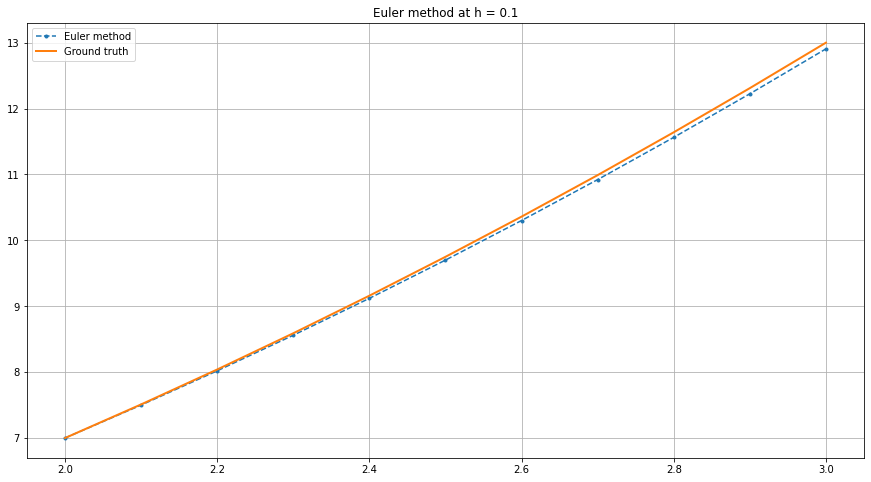

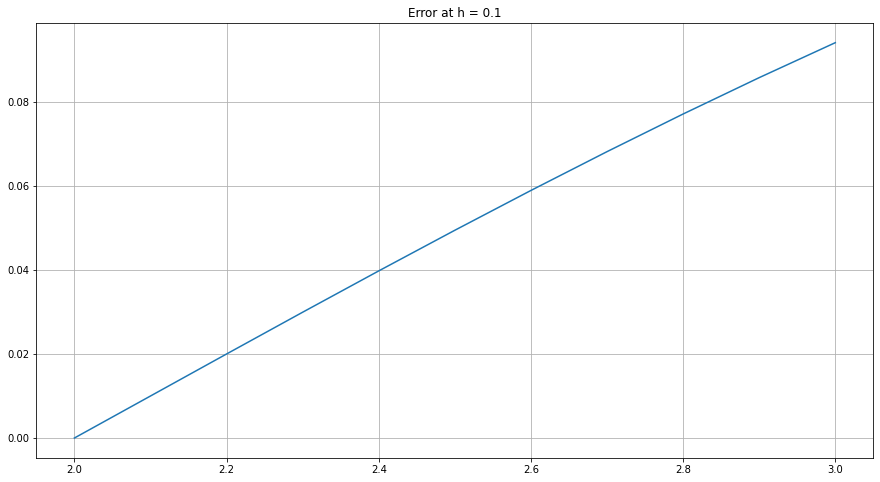

Error =  0.09408431551783458
Error via Runge-Romberg =  0.09831180959887753


In [373]:
plotting(euler,y_sol,'Euler')
runge_romberg(euler,1,h)

In [374]:
def rk_method(x,L,y0,z0,h,f):
    N = int(L/h)
    xx = np.linspace(x,x+L,N+1)
    y = np.empty(N+1)
    z = np.empty(N+1)
    y[0] = y0
    z[0] = z0
    for i in range(N):
        K1 = h * z[i]
        L1 = h * f(x,y[i],z[i])
        K2 = h * (z[i] + L1/2)
        L2 = h * f(x + h/2,y[i] + K1/2, z[i] + L1/2)
        K3 = h * (z[i] + L2/2)
        L3 = h * f(x + h/2,y[i] + K2/2, z[i] + L2/2)
        K4 = h * (z[i] + L3)
        L4 = h * f(x + h,y[i] + K3, z[i] + L3)
        y[i+1] = y[i] + (K1 + 2*K2 + 2*K3 + K4)/6
        z[i+1] = z[i] + (L1 + 2*L2 + 2*L3 + L4)/6
        x = x + h
    return y, xx, z

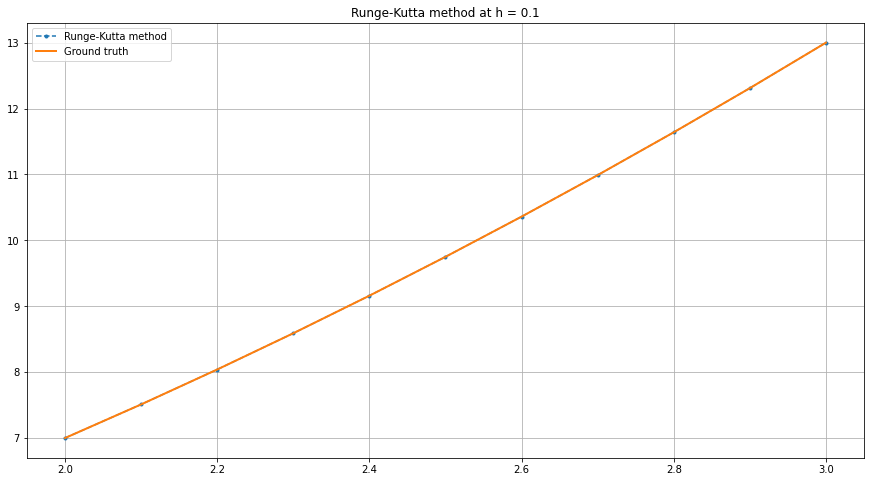

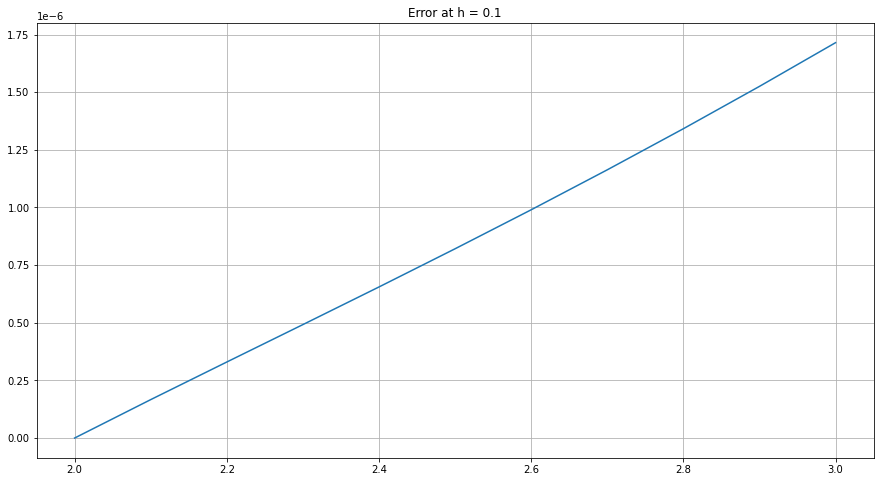

Error =  1.7145642985383347e-06
Error via Runge-Romberg =  1.5775637657829597e-06


In [375]:
plotting(rk_method,y_sol,'Runge-Kutta')
runge_romberg(rk_method,4,h)

In [376]:
def adams(x,L,y0,z,h,f):
    N = int(L/h)
    y = np.empty(N+1)
    z = np.empty(N+1)
    xx = np.linspace(x,x+L,N+1)
    y[:4],xx[:4],z[:4] = rk_method(x,h*3,y0,z0,h,f)
    x = x + 3*h
    for k in range(3,N):
        y[k+1] = y[k] + h*(55*z[k] -59*z[k-1] +37*z[k-2] -9*z[k-3])/24
        z[k+1] = z[k] + h*(55*f(x,y[k],z[k]) -59*f(x-h,y[k-1],z[k-1]) +37*f(x-2*h,y[k-2],z[k-2]) -9*f(x-3*h,y[k-3],z[k-3]))/24
        x = x + h
    return y,xx,z

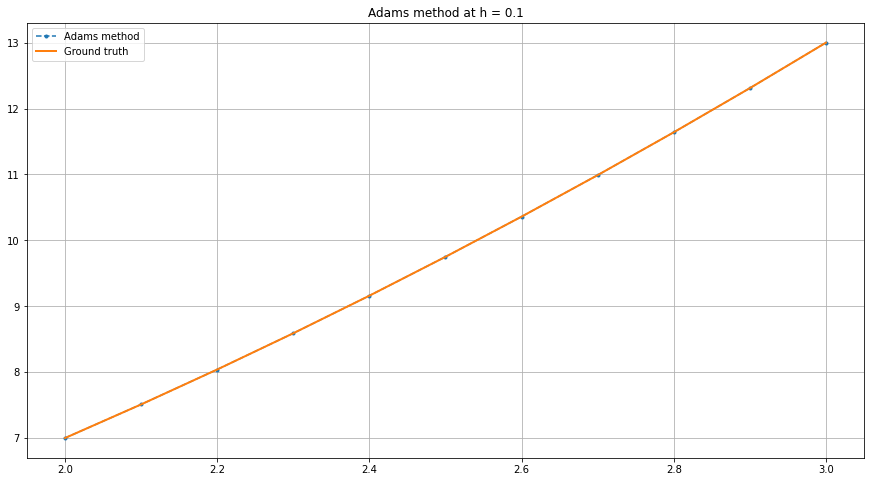

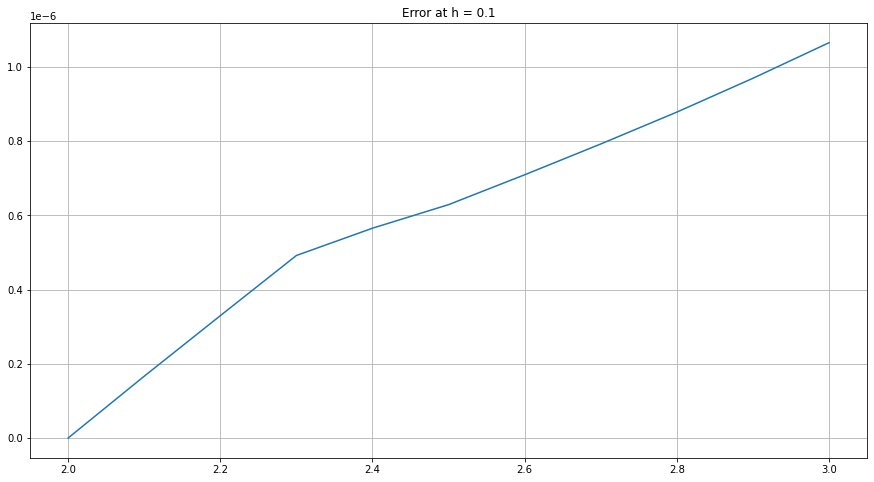

Error =  1.0654588944447596e-06
Error via Runge-Romberg =  1.3809942663793132e-06


In [377]:
plotting(adams,y_sol,'Adams')
runge_romberg(adams,4,h)

# Лабораторная работа 4.2
Трунов Антон М8О-304Б Вариант 16
# Задание
Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 
## Краевая задача
$$
\ddot{y}-\dot{y}\tan{x}+2y=0\\
y(0)=2\\
y(\frac{\pi}{6})=2.5-0.5\ln{3}
$$
## Точное решение
$$
y(x)=\sin(x)+2-\sin(x)\cdot\ln{\frac{1+\sin{x}}{1-\sin{x}}}
$$

# Метод стрельбы
Пусть $z=\dot{y}$. Тогда:
$$
\begin{cases}
\dot{y} = z \\
\dot{z} = z\tan{x}-2y
\end{cases} \\
y(0)=2 \\
y(\frac{\pi}{6}) = 2.5 - 0.5\ln{3}
$$

In [378]:
y_sol = lambda x: np.sin(x) + 2 - np.sin(x)*np.log((1+np.sin(x))/(1-np.sin(x)))
y0 = 2
x0 = 0
y1 = z0= 2.5-np.log(3)/2
x1 = np.pi/6
L = np.pi/6
h = np.pi/60
f = lambda x,y,z: z*np.tan(x) - 2*y

In [379]:
def shooting(x0,L,y0,y1,h,f,maxiter = 1000,eps = 1e-4):
    norm = 1
    i = 2
    n0 = 2.5
    n1 = 2.4
    yy0,xx0,zz0 = rk_method(x0,L,y0,n0,h,f)
    yy1,xx1,zz1 = rk_method(x0,L,y0,n1,h,f)
    while norm > eps and i < maxiter:
        n2 = n1 - ((n1 - n0) / (yy1[-1] - yy0[-1])) * (yy1[-1] - y1)
        n0, n1 = n1, n2
        yy0 = np.copy(yy1)
        yy1,xx1,zz1 = rk_method(x0,L,y0,n2,h,f)
        norm = abs(yy1[-1] - y1)
        i+=1
    return yy1,xx1,zz1

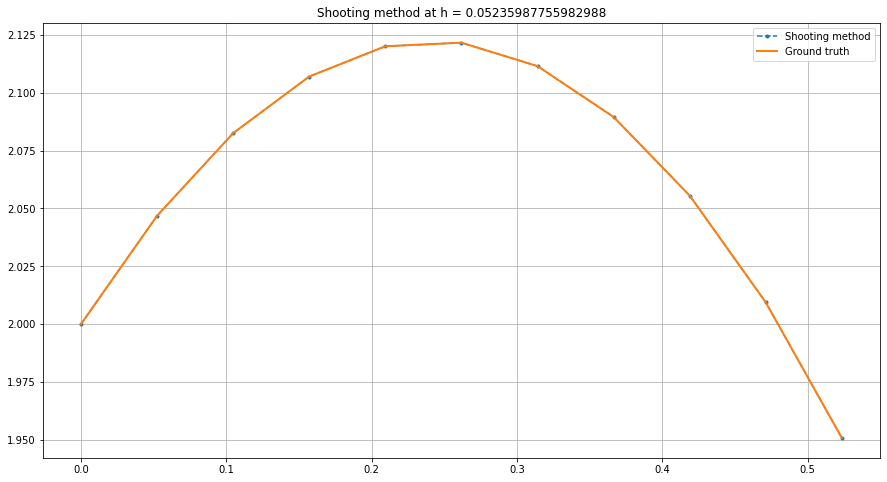

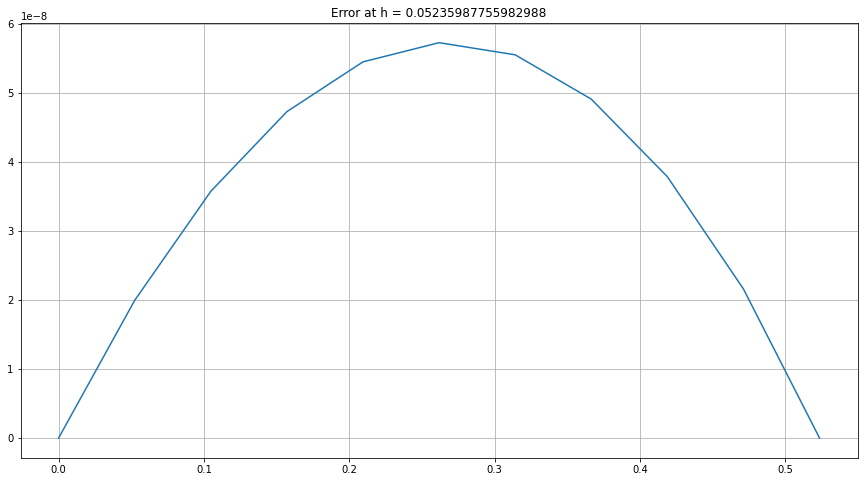

Error =  5.72493221717707e-08
Error via Runge-Romberg =  5.477826242975918e-08


In [380]:
plotting(shooting,y_sol,'Shooting')
runge_romberg(shooting,4,h)

# Конечно-разностный метод
$$
p(x) = -\tan{x} \\
q(x) = 2\\
f(x) = 0
$$

In [381]:
def FDM(x0,L,y0,y1,h,f,p = lambda x: -np.tan(x),q = lambda x: 2 + x*0, ff = lambda x: 0*x):
    N = int(L/h)
    xx = np.linspace(x0,x0+L,N+1)
    b = np.empty(N-1)
    A = np.zeros((N-1,N-1))
    y = np.empty_like(xx)
    y[0], y[-1] = y0, y1
    b[0] = h*h*ff(xx[1]) - (1 - p(xx[1])*h/2)*y0
    A[0,0] = -2 + 2*h*h*q(xx[1])
    A[0,1] = 1 + p(xx[1])*h/2
    for i in range(1,N-2):
        A[i,i-1] = 1 - p(xx[i+1])*h/2
        A[i,i] = -2 + h*h*q(xx[i+1])
        A[i,i+1] = 1 + p(xx[i+1])*h/2
        b[i] = h*h*ff(xx[i+1])
    A[N-2,N-3] = 1 - p(xx[-2])*h/2
    A[N-2,N-2] = -2 + 2*h*h*q(xx[-2])
    b[-1] = h*h*ff(xx[-2]) - (1 + p(xx[-2])*h/2)*y1
    y[1:N] = np.linalg.solve(A,b)
    return y, xx, b

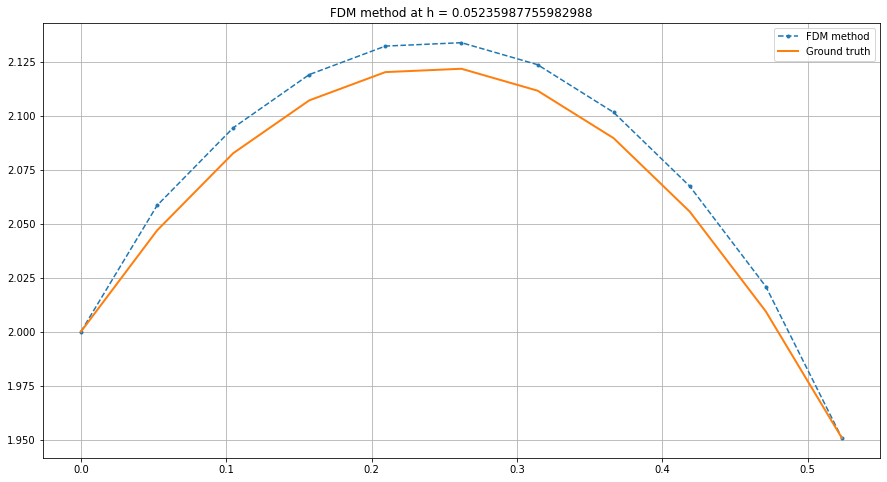

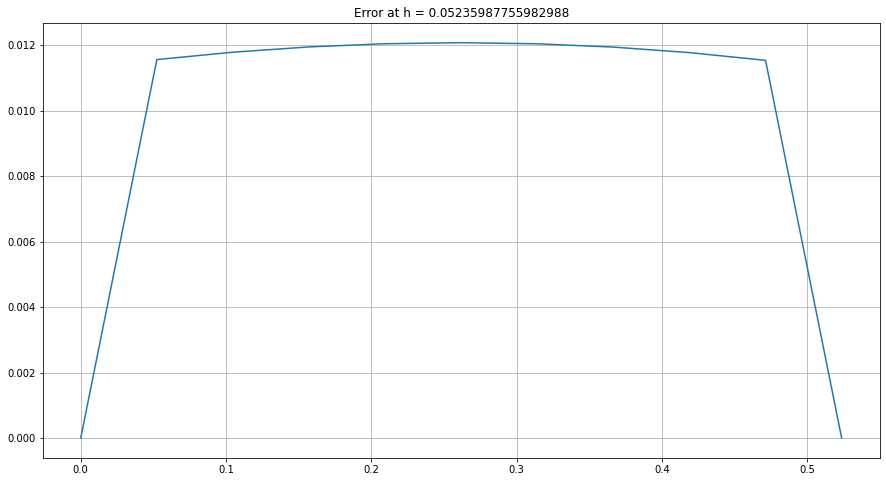

Error =  0.012074705939477237
Error via Runge-Romberg =  0.012736238946078782


In [382]:
plotting(FDM,y_sol,'FDM')
runge_romberg(FDM,2,h)